In [1]:
#pip install yfinance

In [2]:
#importing Yahoo Finance Library for data
import yfinance as yf

#importing libraries for data manipulation

import pandas as pd
import numpy as np

#importing libraries for data visualization
import matplotlib.pylab as plt
import seaborn as sns

#To ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
cost= yf.Ticker("COST")
cost

yfinance.Ticker object <COST>

In [4]:
cost_historical = cost.history(start="2014-11-01", end="2021-11-01")
cost_historical.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-10-25,481.211494,491.414988,478.725525,489.308411,1903400,0.00,0
2021-10-26,481.351286,487.461397,480.452746,484.745789,2378600,0.00,0
2021-10-27,483.068493,490.706131,482.778953,488.319977,1741800,0.00,0
2021-10-28,486.959991,491.829987,486.480011,490.529999,1362400,0.79,0
2021-10-29,486.779999,494.170013,486.660004,491.540009,2471100,0.00,0


In [5]:
cost_historical.reset_index(inplace=True)
cost_historical.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
1756,2021-10-25,481.211494,491.414988,478.725525,489.308411,1903400,0.00,0
1757,2021-10-26,481.351286,487.461397,480.452746,484.745789,2378600,0.00,0
1758,2021-10-27,483.068493,490.706131,482.778953,488.319977,1741800,0.00,0
1759,2021-10-28,486.959991,491.829987,486.480011,490.529999,1362400,0.79,0
1760,2021-10-29,486.779999,494.170013,486.660004,491.540009,2471100,0.00,0


In [6]:
cost_historical['Date'] = pd.to_datetime(cost_historical['Date'])
cost_historical = cost_historical.set_index('Date').asfreq('D')

In [7]:
cost_historical.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2553 entries, 2014-11-03 to 2021-10-29
Freq: D
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1761 non-null   float64
 1   High          1761 non-null   float64
 2   Low           1761 non-null   float64
 3   Close         1761 non-null   float64
 4   Volume        1761 non-null   float64
 5   Dividends     1761 non-null   float64
 6   Stock Splits  1761 non-null   float64
dtypes: float64(7)
memory usage: 159.6 KB


In [8]:
cost_historical= cost_historical['Close']
cost_historical=cost_historical.to_frame()
cost_historical = cost_historical.rename(columns={"Close": "COST"})
cost_historical.head()

,COST
Date,
2014-11-03,113.216171
2014-11-04,115.138672
2014-11-05,115.096512
2014-11-06,115.593994
2014-11-07,116.116791


In [9]:
cost_historical.isnull().sum()

COST    792
dtype: int64

In [10]:
cost_historical.ffill(inplace=True)

In [11]:
cost_historical.isnull().sum()

#cost_historical=cost_historical.dropna()

COST    0
dtype: int64

In [12]:
cost_historical.head()

,COST
Date,
2014-11-03,113.216171
2014-11-04,115.138672
2014-11-05,115.096512
2014-11-06,115.593994
2014-11-07,116.116791


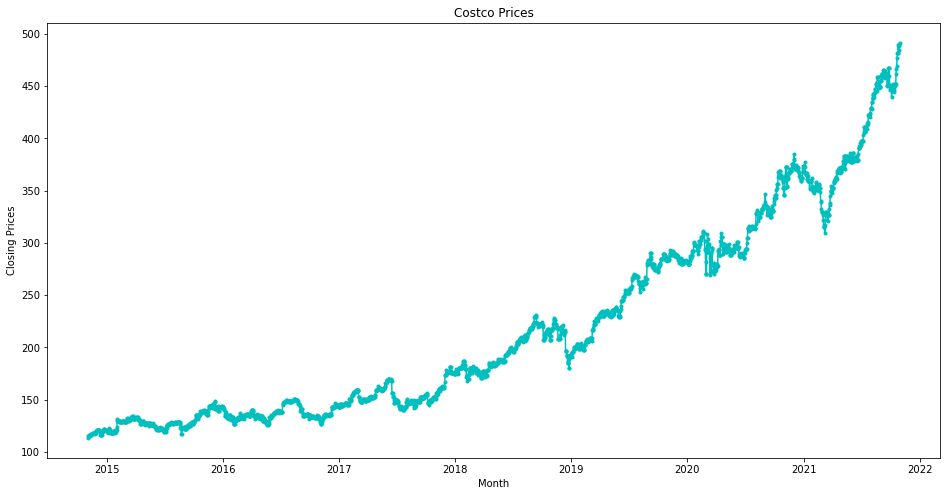

In [13]:
# Visualizing the time series
plt.figure(figsize=(16,8))
plt.xlabel("Month")
plt.ylabel("Closing Prices")
plt.title('Costco Prices')
plt.plot(cost_historical.index, cost_historical.COST, color = 'c', marker='.')

# Splitting the dataset

In [14]:
df_train = cost_historical.loc['2014-11-03':'2018-09-01']
df_test = cost_historical.loc['2016-09-02' : '2021-10-29']
print(df_train)
print(df_test)

                  COST
Date                  
2014-11-03  113.216171
2014-11-04  115.138672
2014-11-05  115.096512
2014-11-06  115.593994
2014-11-07  116.116791
...                ...
2018-08-28  217.601746
2018-08-29  217.535599
2018-08-30  218.681885
2018-08-31  220.860886
2018-09-01  220.860886

[1399 rows x 1 columns]
                  COST
Date                  
2016-09-02  140.597870
2016-09-03  140.597870
2016-09-04  140.597870
2016-09-05  140.597870
2016-09-06  140.669022
...                ...
2021-10-25  489.308411
2021-10-26  484.745789
2021-10-27  488.319977
2021-10-28  490.529999
2021-10-29  491.540009

[1884 rows x 1 columns]


Now let us check the rolling mean and standard deviation of the series to visualize if the series has any trend or seasonality.

# Testing the stationarity of the series

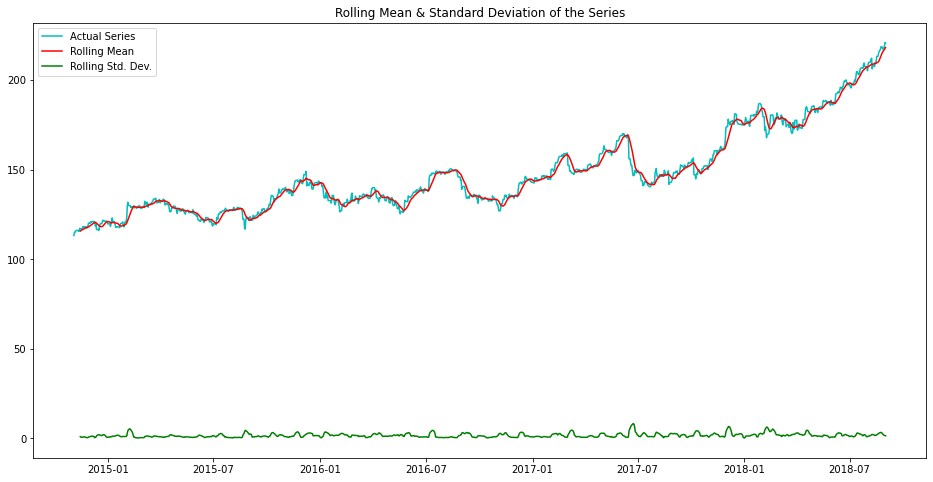

In [15]:
# Calculating the rolling mean and standard deviation for a window of 12 observations
rolmean=df_train.rolling(window=12).mean()
rolstd=df_train.rolling(window=12).std()

#Visualizing the rolling mean and standard deviation

plt.figure(figsize=(16,8))
actual = plt.plot(df_train, color='c', label='Actual Series')
rollingmean = plt.plot(rolmean, color='red', label='Rolling Mean') 
rollingstd = plt.plot(rolstd, color='green', label='Rolling Std. Dev.')
plt.title('Rolling Mean & Standard Deviation of the Series')
plt.legend()
plt.show()

Observations:

We can see there is a upward trend in the series.
We can confirm that the series is not stationary.
We can also use the Augmented Dickey-Fuller (ADF) Test to verify if the series is stationary or not. The null and alternate hypotheses for the ADF Test are defined as:

Null hypothesis: The Time Series is non-stationary
Alternative hypothesis: The Time Series is stationary

In [16]:
#Define a function to use adfuller test
def ad_fuller(df_train):
  #Importing adfuller using statsmodels
  from statsmodels.tsa.stattools import adfuller
  print('Dickey-Fuller Test: ')
  adftest = adfuller(df_train['COST'])
  adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Observations'])
  for key,value in adftest[4].items():
    adfoutput['Critical Value (%s)'%key] = value
  print(adfoutput)
ad_fuller(df_train)

Dickey-Fuller Test: 
Test Statistic             0.667049
p-value                    0.989157
Lags Used                  2.000000
No. of Observations     1396.000000
Critical Value (1%)       -3.435043
Critical Value (5%)       -2.863613
Critical Value (10%)      -2.567873
dtype: float64


Observations:

From the above test, we can see that the p-value = 0.988 i.e. > 0.05 (For 95% confidence intervals) therefore, we fail to reject the null hypothesis.
Hence, we can confirm that the series is non-stationary.

# Making the series stationary

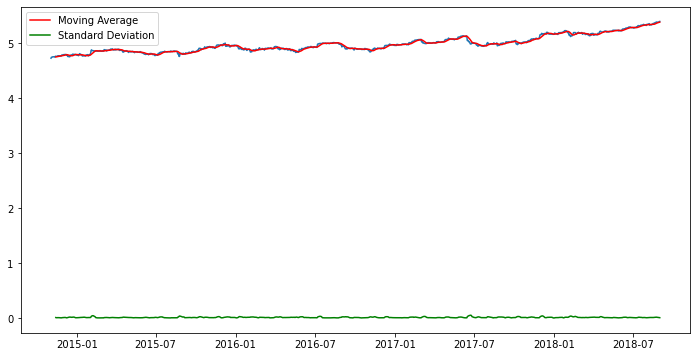

In [17]:
# Visualize the rolling mean and standard deviation after using log transformation
plt.figure(figsize=(12,6))
df_log = np.log(df_train)
MAvg = df_log.rolling(window=12).mean()
MStd = df_log.rolling(window=12).std()
plt.plot(df_log)
plt.plot(MAvg, color='r', label = 'Moving Average')
plt.plot(MStd, color='g', label = 'Standard Deviation')
plt.legend()
plt.show()

Observations:

Since we can still see the upward trend in the series, we can conclude that the series is still non-stationary.
However, the standard deviation is almost constant which implies that now the series has constant variance.
Let's shift the series by order 1 (or by 1 month) & apply differencing (using lagged series)

and then check the rolling mean and standard deviation.

In [18]:
ad_fuller(df_log)

Dickey-Fuller Test: 
Test Statistic             0.076617
p-value                    0.964428
Lags Used                  5.000000
No. of Observations     1393.000000
Critical Value (1%)       -3.435053
Critical Value (5%)       -2.863617
Critical Value (10%)      -2.567876
dtype: float64


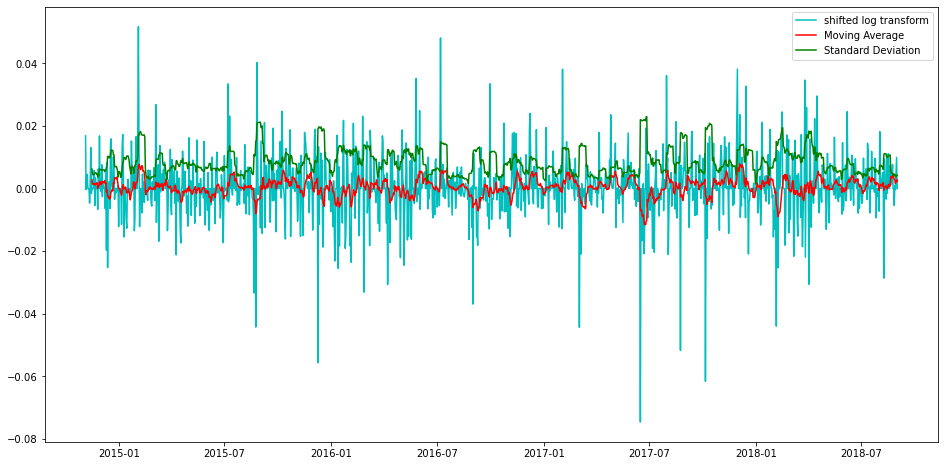

In [19]:
plt.figure(figsize=(16,8))
df_shift = df_log - df_log.shift(periods = 1)
MAvg_shift = df_shift.rolling(window=12).mean()
MStd_shift = df_shift.rolling(window=12).std()
plt.plot(df_shift, color='c', label = 'shifted log transform')
plt.plot(MAvg_shift, color='red', label = 'Moving Average')
plt.plot(MStd_shift, color='green', label = 'Standard Deviation')
plt.legend()
plt.show()

#Dropping the null values that we get after applying differencing method
df_shift = df_shift.dropna()

In [20]:
ad_fuller(df_shift)

Dickey-Fuller Test: 
Test Statistic         -1.791065e+01
p-value                 2.930417e-30
Lags Used               4.000000e+00
No. of Observations     1.393000e+03
Critical Value (1%)    -3.435053e+00
Critical Value (5%)    -2.863617e+00
Critical Value (10%)   -2.567876e+00
dtype: float64


Observations:


It appears that the series is stationary, however, ADF test has to be carried out to check for stationarity.
The moving average and the standard deviation are almost constant which implies that now the transformed series has constant mean and variance which do not fluctuate over time

In [21]:

#df_train = df_train.sort_index(inplace= True)

df_train.isnull().sum()

COST    0
dtype: int64

In [22]:
df_train.index.year

Int64Index([2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
            ...
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
           dtype='int64', name='Date', length=1399)

# Decomposing the time series components into Trend, Seasonality and Residual

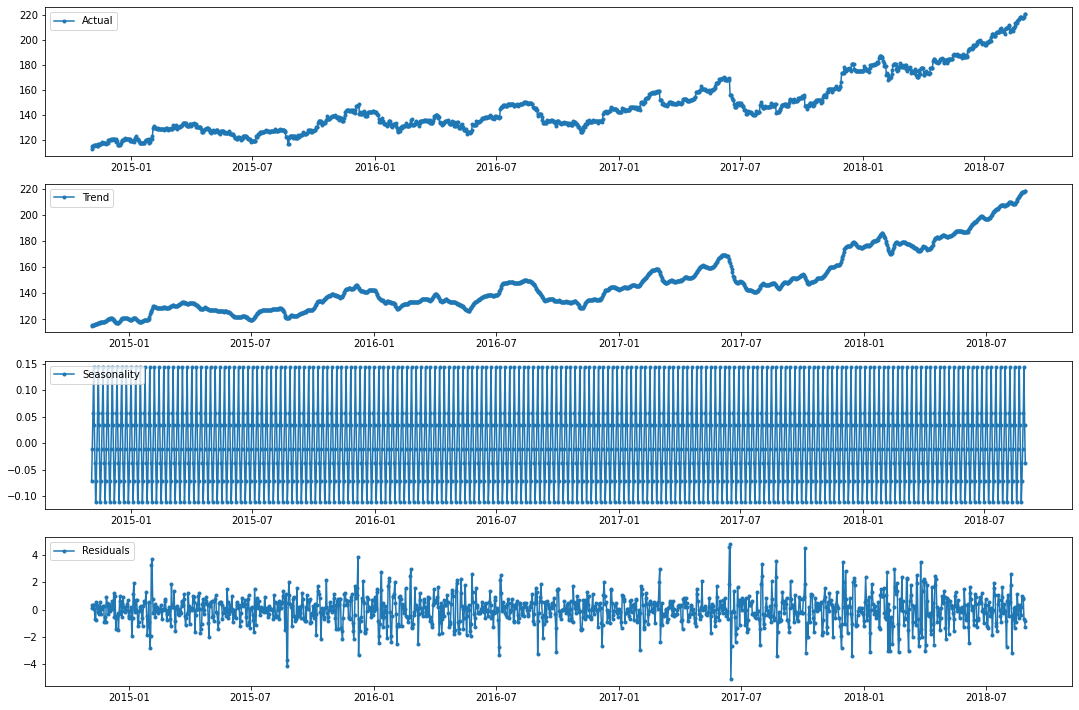

In [23]:
#Importing the seasonal_decompose to decompose the time series
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(df_train)

decomp = seasonal_decompose(df_train)
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid


plt.figure(figsize=(15,10))
plt.subplot(411)
plt.plot(df_train, label='Actual', marker='.')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', marker='.')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', marker='.')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals', marker='.')
plt.legend(loc='upper left')
plt.tight_layout()




# Plotting the auto-correlation function and partial auto-correlation function to get p and q values for AR, MA, ARMA, and ARIMA models

<Figure size 1152x576 with 0 Axes>

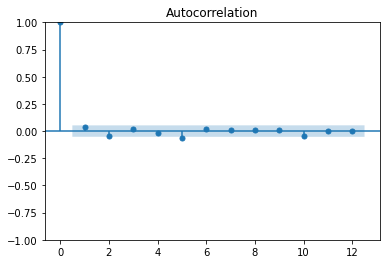

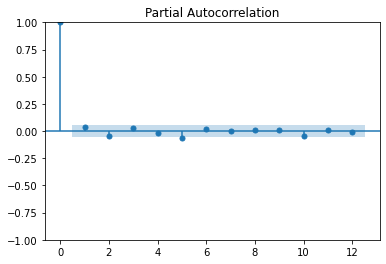

In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plt.figure(figsize = (16,8))
plot_acf(df_shift, lags = 12) 
plt.show() 
plot_pacf(df_shift, lags = 12) 
plt.show()

# ARMA Model
We will be using an ARIMA model with p=1 and q=1 (as observed from the ACF and PACF plots) and d=0 so that it will work as an ARMA model.

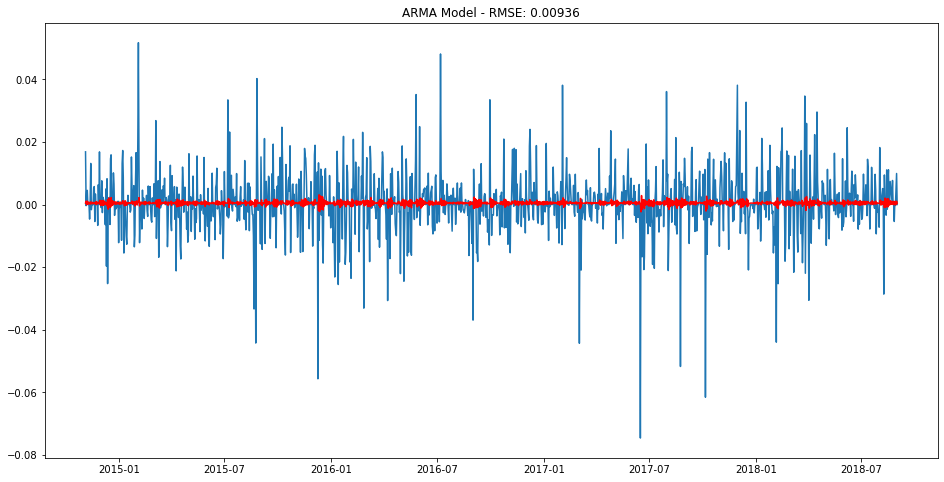

In [25]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

plt.figure(figsize=(16,8))
model_ARMA = ARIMA(df_shift, order=(1, 0, 1)) #Using p=1, d=0, q=1 and apply ARIMA function on df_shift series
results_ARMA = model_ARMA.fit()
plt.plot(df_shift)
plt.plot(results_ARMA.fittedvalues, color='red')
plt.title('ARMA Model - RMSE: %.5f'% mean_squared_error(results_ARMA.fittedvalues,df_shift['COST'], squared=False))
plt.show()

In [26]:
results_ARMA.aic

-9086.329722434733

# ARIMA Model
We will be using an ARIMA Model with p=1, d=1, & q=1.

In [27]:
df_shift.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1398 entries, 2014-11-04 to 2018-09-01
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   COST    1398 non-null   float64
dtypes: float64(1)
memory usage: 21.8 KB


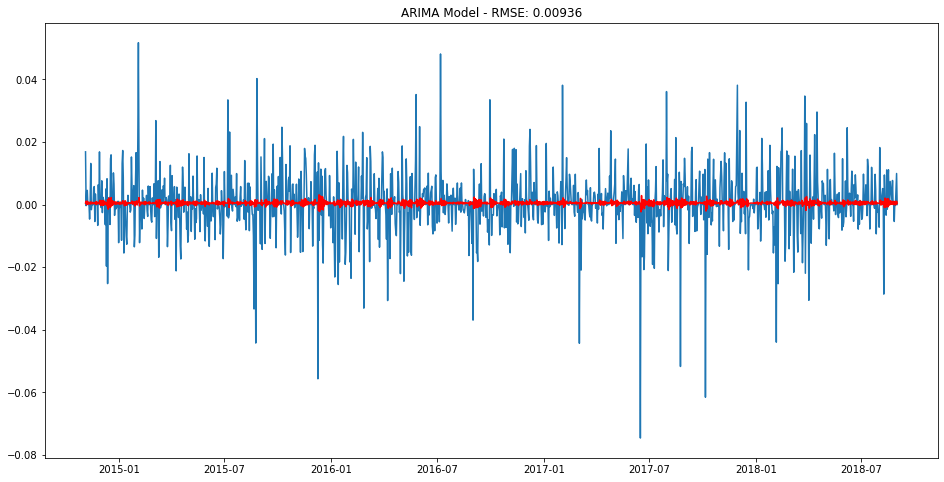

In [30]:
plt.figure(figsize=(16,8))
model_ARIMA = ARIMA(df_shift, order=(1,0,1)) #Using p=1, d=1, q=1 and apply ARIMA function on df_log series
results_ARIMA = model_ARIMA.fit()
plt.plot(df_shift)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('ARIMA Model - RMSE: %.5f'% mean_squared_error(results_ARIMA.fittedvalues,df_shift['COST'], squared=False))
plt.show()

In [ ]:
results_ARIMA.aic

Observations

The ARIMA model results are the same as ARMA model results above. This is expected as the ARIMA model was on the df_shift series with d =0 and the ARMA model is on df_shift 

Further, ARIMA model has similar RMSE values 

# Predicting the model with fitted ARIMA(1,0,1)

In [31]:
# Printing the fitted values
predictions=pd.Series(results_ARIMA.fittedvalues)
predictions

Date
2014-11-04    0.000475
2014-11-05    0.001072
2014-11-06   -0.000062
2014-11-07    0.001077
2014-11-08    0.000122
                ...   
2018-08-28   -0.000119
2018-08-29    0.001000
2018-08-30   -0.000002
2018-08-31    0.001074
2018-09-01    0.000349
Freq: D, Length: 1398, dtype: float64